# 2. Tree model

## Information Criteria
* ### Uncertainty(불확실성) <br/>
  - related to our **surprise** at an event<br/><br/>
ex) 내일 해가 뜰 껏이다.   => 그렇게 놀랍지 않음<br/><br/>
    내일 해가 뜨지 않을 것이다.  => 매우 놀라운 일<br/><br/>
    Uncertainly는 event의 확률과 반비례한다.<br/><br/><br/>
* ### Entropy <br/>
    - A measure of uncertainly of a random variable in terms of bits(log2)<br/>
     **        = Average Uncertainty**<br/><br/>
ex) 해가 뜬다<br/><br/>
    A : 내일 해가 뜬다.          p(A) = p1<br/>
    B : 내일 해가 뜨지 않는다.    p(B) = p2<br/>
    <center>**Average Uncertainty** about sun rising<br/></center><br/>
    $$= p(A)Uncetainty(A) + p(B)Uncertainty(B) $$<br/>
    $$= -p_1log_2{p_1}-p_2log_2{p_2} = -\sum p_ilog{p_i} = Entropy $$
    <br/>
    - Information theory : optimal length code assigns -log p bits tp message having probability p
### Entropy  maximum at maximum randomness 

<img style="float: right;" src="picture/entropy.png"><br/>
Example : Coin Toss<br/><br/>
P(heads) = 0.1     => not very random<br/>
H(x) = 0.47 bits<br/><br/><br/>
P(heads) = 0.5    => Completely random <br/>
H(x) = 1 bits

* ### Conditional Entropy <br/>
    - Expected entropy of conditional distribution averaged over the conditioning random variable<br/><br/>
$$   H(Y|X) = \sum_{x_i}p(x_i)H(Y | X=x_i) = -\sum_{x_i}\sum_{y_i}p(x_i,y_i)log{p(y_i|x_i)}  $$
<br/>
* ### Relative Entropy <br/>
    - A measure of distance between two probability distributions <br/><br/>
    - 두 확률분포가 얼마나 비슷한지 (두 변수가 얼마나 비슷한지) <br/><br/>
$$ D(p(X)||q(X)) = \sum_{x_i}p(x_i)log\frac{q(x_i)}{p(x_i)} $$
<br/>
* ### Mutual Information <br/>
    - Relative entropy between joint distribution p(X,Y) and product distribution p(X)p(Y)<br/><br/>
    - 두 변수간의 interaction을 고려햇을 때와 단순히 두 변수를 독립으로 가정했을 때와의 uncertainty감소량 <br/><br/>
    - 두 변수간의 interaction이 얼마나 있는지
<br/><br/>
$$ I(X;Y)=D(p(X,Y)|p(X)p(Y))$$<br/>
$$ = \sum_{x_iy_i}p(x_i,y_i)log\frac{p(x_i,y_i)}{p(x_i)p(y_i)}$$<br/>
$$= H(X) - H(X|Y) $$

### ** Information Gain ** 
- Gain(S, A) = expected reduction in entropy due to sorting on A
$$ Gain(S,A) = Entropy(S) - \sum_{v\in Values(A)}\frac{|S_v|}{|S|}Entropy(S_v)  $$
- Selecting next attribute using information gain
<img style="float: left;" src="picture/decisiontree.png"><br/>
=> Humity가 더 좋은 attribute이다. 왜냐하면 humity로 분류함으로써 더 information gain이 크고 데이터의 불확실성이 줄어들기 때문이다.

## Decision Tree
* Decision tree는 feature들의 조건을 tree구조로써 각 node에 대응시켜서 각 입력 변수들이 root node로 부터 leaf node에 해당하는 feature값의 조건을 가질 때 특정 label을 가진다고 예측하는 방법의 supervised learning의 일종이다.
<img style="float: left;" src="picture/decisiontree2.png"><br/>
* decision tree에서의 learning은 각각의 데이터를 information이 더 큰 feature를 분할 기준으로 선택해 나눠가는 과정이다. 이 과정은 분할로 인해서 더이상 새로운 예측값이 추가되지 않고나 부분 집합의 노드가 목표 변수와 같은 값을 지닐 때까지 반복된다.<br/><br/>
* 많이 쓰는 알고리즘으로 ID3(Iterative Dichotomiser 3)가 있다
    1) initial open node 만들기<br/>
    2) initial node에 instance넣기<br/>
    3) open node가 없을 때까지 반복<br/>
    open node선택은 best variable을 정의하고(Information Gain이용) -> <br/>
    선택된 variable마다 instance sort -> sorted item을 branch 밑으로 넣기(+이면 +, -이면 -)
 <br/><br/>   
* Decision tree의 문제점<br/>
지금의 data에 대해선 잘 예측할 수 있지만 real world data에 대해서 inconsistent할 수 있다.

### Classification problem

In [1]:
from sklearn.tree import DecisionTreeClassifier
from numpy.random import RandomState
import matplotlib.pyplot as plt

import pandas as pd

%matplotlib inline


In [2]:
from tools import rmse_cal,mae_cal,cor_cal,mean_cal,frange,\
                    accuracy,precision,recall,aupr,f1_score,make_binary
from validation import classification_cv,regression_cv,external_val_reg,\
                        external_val_classif, test_preprocessing, cal_external_auc

In [3]:
dataset=pd.read_table('data/breast_cancer_svc.tsv',sep='\t')

In [4]:
dt=DecisionTreeClassifier(criterion="entropy",splitter="random",min_samples_split=20,
                          random_state=RandomState(None),presort=True)
#criteria : 정보 획득 정도를 entropy를 이용할껀지 지니계수를 이용할껀지
#splitter : 각 노드에서 분리를 할 때 사용하는 방법( best : 최선의 결과로 자름 
#            / random :random하게 자른 것 중 최선을 택함
#max_feature : tree를 만들면서 분리 기준을 만들때 고려할 최대 feature 개수 제한
#max_depth : tree의 depth제한
# min_samples_split : 노드를 분리시킬때 필요한 최소한의 sample개수 제한
# min_weight_fraction_leaf : sample weight
# max_leaf_node : 최대 leaf 노드의 개수
#presort  : 가장 좋은 split을 빨리 찾기 위해 데이터를 미ㅣ리 sorting할껀지

10-fold cross validation

In [5]:
cv_result=classification_cv(10,dt,dataset)

accuracy : 0.884517766497
precision :0.505263157895
recall : 0.521739130435
f1_score : 0.513368983957


ROC curve

In [6]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

def cal_auc(inputdf,model,testratio):
    #preprocessing for ROC curve

    input_data=inputdf.iloc[:,1:].transpose()
    X_data=input_data.iloc[:,:-1].values
    y_data=input_data.iloc[:,-1]
    y_data=make_binary('normal','cancer',y_data)

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=testratio
                                                    ,random_state=RandomState(None))
    model.fit(X_train,y_train)
    
    #각 sample들을 분류하기 위한 decision을 내리는 함수
    y_score = model.fit(X_train, y_train).predict(X_test)
    fpr,tpr,threshold = roc_curve(y_test,y_score,pos_label=1)
    roc_auc=auc(fpr,tpr)
    Aupr = aupr(y_test,y_score)
    
    return y_score,fpr,tpr,threshold,roc_auc

In [7]:
def draw_roc(inputdf,model,testratio):

    plt.figure()
    lw=2
    y_score, fpr,tpr,threshold ,roc_auc= cal_auc(inputdf,model,testratio)

    plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC curve (area=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

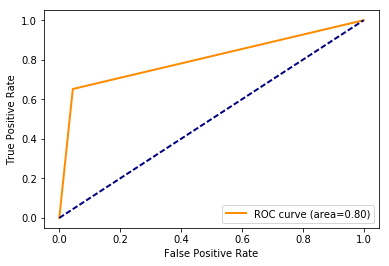

In [8]:
draw_roc(dataset,dt,.2)

External validation

In [9]:
testset=pd.read_table('data/breast_cancer_test.tsv',sep='\t')
test_result=external_val_classif(testset,dataset,dt)

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,37,38,39,40,41,43,44,46,48,51,52,53,54,55,56,57,58,59,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


accuracy : 0.819444444444
precision :0.1
recall : 0.2
f1_score : 0.133333333333


### Regression problem
- y값을 int데이터가 아닌 floating point로 보고 decision tree를 이용해서 fitting한다.

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
reg_data=pd.read_table('data/blood_age_selected_lasso.tsv',sep='\t')

In [12]:
dt_reg=DecisionTreeRegressor(criterion='mse', splitter='random',min_samples_split=20,
                             presort=True,random_state=RandomState(None))

In [13]:
cv_result=regression_cv(10,dt_reg,reg_data)

rmse : 10.1930922271
mad : 8.04086361115
cor : 0.749863587488


In [14]:
test_data=pd.read_table('data/blood_age_test.tsv',sep='\t')
test_result=external_val_reg(test_data,reg_data,dt_reg)

rmse = 15.1892441268
mae = 13.547158229
cor = 0.810373826905


---

## Ensemble method

- **Ensemble method**는 더 좋은 성능을 얻기 위해서 여러가지 learning algorithm을 함께 쓰는 방법을 의미한다.<br/><br/>
supervised learning algorithm은 보통 특정 문제에 대해서 가장 좋은 prediction을 할 수 있는 적절한 가설(hypothesis function)을 가설 공간(hyphothesis space)에서 찾고자 하는 목표를 가진다.<br/>
앙상블(ensemble)방법은 더 나은 가설을 찾기 위해 여러 가설(hypothesis function)들을 결합한다.<br/>
- 보통 앙상블 방법은 모델들 사이에 성능이 큰 차이를 보일 경우 더 나은 결과를 가져온다.

### Ensemble종류
- ** Bayes optimal classifier ** <br/>
이 방법은 classification problem에서 이용하는 방법으로 모든 가설 공간(hypothetis space)안에 있는 모든 가설(hypothesis function)의 앙상블한다.<br/>
각 hypothesis는 hypothesis가 참일때 training dataset을 특정 class에 대해서 얼마나 잘 설명해줄 수 있는 데(얼마나 많이 설명해 줄 수 있는지)에 대한 확률에 비례하게 각 class에 투표한다.<br/> 모든 hypothesis 의 결과를 합했을 때 class들 중 더 높은 값을 같은 class의 결과로 예측한다. <br/>

$$ y=argmax_{c_j\in C}\sum_{h_j\in H}P(c_j|h_j)P(T|h_j)P(h_j)  $$
<br/>
- ex) p(h1|D)=0.4, p(-|h1)=0, p(+|h1)=1<br/>
    p(h2|D)=0.3, p(-|h2)=1, p(+|h2)=0 <br/>
    p(h3|D)=0.3, p(-|h3)=1, p(+|h3)=0 <br/>
    <br/>
    $ \sum_{h_j \in H}P(+|h_j)](h_j|D)=0.4 $ <br/>
    $ \sum_{h_j \in H}P(-|h_j)](h_j|D)=0.6 $ <br/><br/>
    따라서 해당 데이터 집단은 - class로 예측한다
<br/><br/>
- ** Bootstrap aggregating(bagging) ** <br/>
 bootstrap은 전체 training data에서 training data의 개수와 동일한 개수의 sample을 복원추출(resample with replacement)하는 것을 여러번 반복해서 통계적 추정을 함으로써, 추정한 통계량이 얼마나 신뢰도를 같는지 구하는 방법이다. <br/><br/> bagging은 bootstrap 분석을 사용해서 여러 가설함수를 만든 다음 각각을 동일한 weight를 줌으로써 학습을 하는 앙상블 기법이다<br/><br/>
이때 regression의 경우는 각각의 모델(가설)의 결과를 평균내어 가장 좋은 방법을 얻고, classification같은 경우는 각 모델에서 가장 많이 나온 결과를 투표하여 결과를 예측한다.예시로써 random forest classifier가 있다.<br/><br/><br/>


## Random Forest

bagging 방법을 이용한 ensemble방법의 하나로 여러 tree들이 bootstraped sample들을 이용해서 만들어지고, 다수의 tree가 판정한 결과로 예측한다<br/><br/>
또 random forest에서 split은 feature들의 random subset중 가장 좋은 split이 선택된다.<br/> 이러한 random ness에 의해서 bias는 약간 증가하지만 variance가 감소하기 때문에 overfitting을 방지하고 더욱 general한 모델을 얻을 수 있다. 

### Measure
- **oob error(Out-of-bag error)** : bagging방법을 이용했을때 prediction error를 measure하는 방법 중 하나이다.<br/>
oob는 특정 training sample a에 대해서 a를 가지고 있지 않는 모델(tree)들의 예측값의 error값의 평균이다.

### Classification problem

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
dataset=pd.read_table('data/breast_cancer_svc.tsv',sep='\t')

In [17]:
rf = RandomForestClassifier(n_estimators=20, criterion='entropy',  min_samples_split=10,
                            max_features='auto', bootstrap=True, oob_score=True,
                            n_jobs=10, random_state=RandomState(None), warm_start=True)
#oob_score : bootstrap 방법을 이용했을 때 generalized accuracy를 구하는 방법으로 이 measure를 구할건지
#warm_start  이전에 함수를 calling했을 때 썼던 solution들을 다시 이용하고, 더 많은 estimator를 그다음에 새로 추가하는 옵션이다.

In [18]:
cv_result=classification_cv(10,rf,dataset)

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:303: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


accuracy : 0.975888324873
precision :0.8
recall : 1.0
f1_score : 0.888888888889


In [19]:
rf.oob_score_

0.96197183098591554

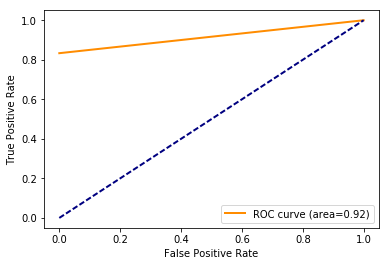

In [20]:
draw_roc(dataset,rf,.2)

In [21]:
testset=pd.read_table('data/breast_cancer_test.tsv',sep='\t')

In [22]:
ext=external_val_classif(testset,dataset,rf)

accuracy : 0.888888888889
precision :0.2
recall : 1.0
f1_score : 0.333333333333


## Regression problem

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
reg_data=pd.read_table('data/blood_age_selected_lasso.tsv',sep='\t')

In [26]:
rf_reg=rf = RandomForestRegressor(n_estimators=20, criterion='mse',  min_samples_split=10,
                            max_features='auto', bootstrap=True, oob_score=True,
                            n_jobs=10, random_state=RandomState(None), warm_start=True)

In [27]:
cv_resul=regression_cv(10,rf_reg,reg_data)

rmse : 3.57937226664
mad : 2.55787897058
cor : 0.972349301911


In [28]:
test_data=pd.read_table('data/blood_age_test.tsv',sep='\t')

In [29]:
external=external_val_reg(test_data,reg_data,rf_reg)

rmse = 8.35093739503
mae = 7.1579711209
cor = 0.893253560175
